In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
%matplotlib inline


In [2]:
train = pd.read_csv("bitcoin_price_Training - Training.csv")
test = pd.read_csv("bitcoin_price_1week_Test - Test.csv")

In [5]:
print(train.shape)
print(test.shape)

(1556, 7)
(7, 7)


In [6]:
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [7]:
train.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [8]:
# Setup chronoligical order
train = train[::-1] 
test = test[::-1]
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [10]:
#Change the date notation(string date) to numerical date
# example: April 28, 2013 ===> 2013-04-28

from dateutil.parser import parse
from datetime import datetime

def convert(date):
    holder = []
    for i in date:
        tp = parse(i).timestamp()
        dt = datetime.fromtimestamp(tp)
        holder.append(dt)
    return np.array(holder)

In [11]:
date = train['Date'].values
date_n = convert(date)

In [12]:
# sanity check
print(len(date_n) == train.shape[0])

True


In [13]:
train['Date'] = date_n
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [14]:
# Set Index as Date
train = train.set_index('Date')
train.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [15]:
train.describe()


,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [16]:
# check the missing values
train.isnull().any()

Open          False
High          False
Low           False
Close         False
Volume        False
Market Cap    False
dtype: bool

C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


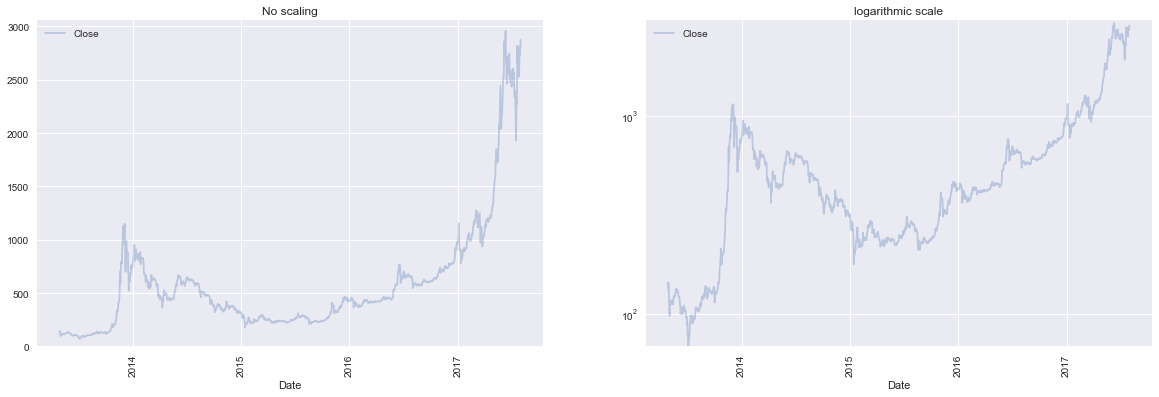

In [17]:
#Visualization of closing price (on row data & log-scale)

plt.figure(num=None, figsize=(20, 6))
plt.subplot(1,2,1)
ax = train['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(0, np.max(train['Close'] + 100))
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = train['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(train['Close'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()


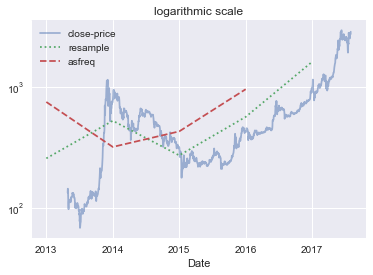

In [18]:
close = train['Close']
close.plot(alpha=0.5, style='-')
close.resample('BA').mean().plot(style=':')
close.asfreq('BA').plot(style='--')
plt.yscale('log')
plt.title("logarithmic scale")
plt.legend(['close-price', 'resample', 'asfreq'], 
           loc='upper left')

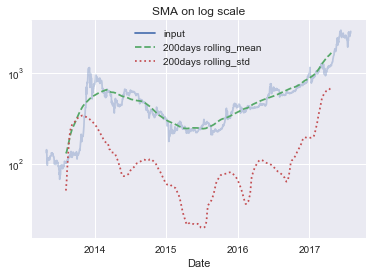

In [19]:
rolling = close.rolling(200, center=True)

data = pd.DataFrame({'input': close, 
                     '200days rolling_mean': rolling.mean(), 
                     '200days rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.set_yscale('log')
ax.set_title("SMA on log scale")
rolling = close.rolling(365, center=True)
ax.lines[0].set_alpha(0.3)

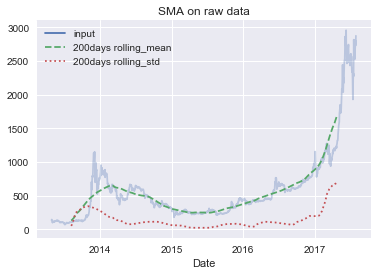

In [20]:
ax = data.plot(style=['-', '--', ':'])
ax.set_title("SMA on raw data")
ax.lines[0].set_alpha(0.3)

In [23]:
from pandas.plotting import lag_plot

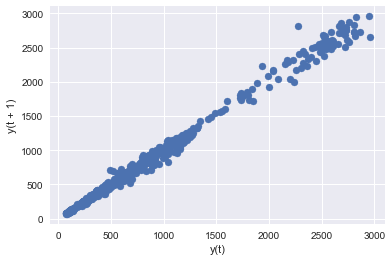

In [24]:
lag_plot(close)

In [25]:
from pandas.plotting import autocorrelation_plot

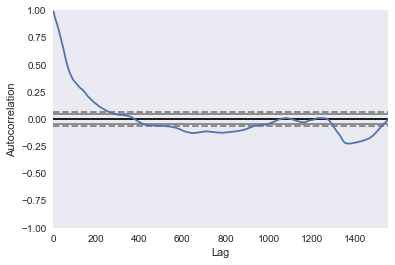

In [26]:
autocorrelation_plot(close)

In [28]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf

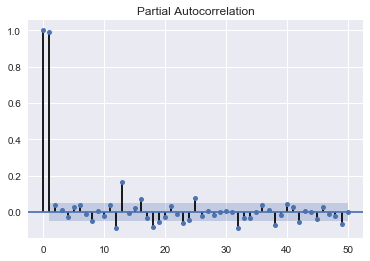

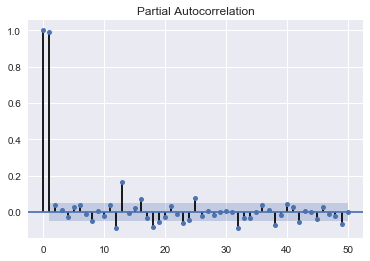

In [29]:
plot_pacf(close, lags=50)

In [30]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [31]:
test = test['Close'].values

In [32]:
train_pr = train['Close'].values

In [33]:
model = AR(train_pr)
model_fit = model.fit()

In [34]:
print ("Coefficients: %s" % model_fit.params)

Coefficients: [-5.93224038e-01  9.68541384e-01 -4.46816657e-03  1.08726752e-02
  5.62501188e-02 -1.96305055e-02 -2.04566246e-02 -3.68850269e-02
  2.25865872e-02  9.09395297e-05  4.63140594e-02  6.96864349e-02
 -6.15615194e-02 -4.82916394e-02  9.21960256e-02 -9.52353216e-03
  2.55395829e-03 -1.29667192e-02 -3.87685150e-02 -4.24641381e-02
  1.07858677e-02 -1.28956465e-01  1.98373368e-01 -1.08179141e-01
  5.81163082e-02]


In [36]:
pred = model_fit.predict(start=len(train), end=len(train_pr)+len(test)-1, dynamic=False)
mse = mean_squared_error(test,pred)
print ("Test MSE {0:.3f}".format(mse))

Test MSE 36821.060


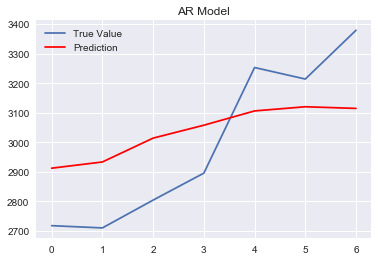

In [37]:
plt.plot(test, label='True Value')
plt.plot(pred, color='red', label='Prediction')
plt.title("AR Model")
plt.legend()

In [39]:
train.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object